# <center> R5.A.11 Méthodes d'optimisation <br> TP3 - Clustering </center>
<center> 2024/2025 - Thibault Godin & Tom Ferragut </center>
<center> IUT de Vannes, BUT Informatique </center>

# Clustering en 2 dimensions


On part d'un ensemble de points $(x_1,x_2,...,x_n)$, dans un espace 2D réel.

Le but de l'algorithme __k-means__ est de partitionner ces $n$ points en $k$ sous-ensembles $S_1, ..., S_k$ tel que la somme des distances à l'intérieur d'un cluster


$$ \sum_{i=1}^{k} \; \sum_{x_j \in S_i} \;  \left\|x_j -  μ_i  \right\|^2$$

soit minimale. Ici, les $μ_i$ désignent les _centroïdes_ (les barycentres des clusters).


Dans ce TP, on va implémenter cet algorithme.

### imports


In [1]:
import numpy as np

# Affichage graphique
#%matplotlib notebook
%matplotlib inline
# enable interactivity of plots
# attention a bien fermer les fenetres plt après chaque visualisation


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 


#heatmaps

import seaborn as sns
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']




## 1- Données test & implémentation du clustering


On construit artificiellement un ensemble de données se prétant bien au clustering (i.e. dont le partitionnement est évident).

Le but est de tester notre algorithme avec ces données avant de passer au monde réel.

La fonction `clusters` génère des données favorables. 

>__Question 1__ : Expliquer son fonctionnement en commentant le code.

In [2]:
nclusters = 5 # nombre souhaité de clusters
sizes = 50*np.ones(nclusters,int) # taille de chaque cluster


def clusters(sizes, min=-50,max=50,var=2.5): 
    """
    creates a set of clusters whose sizes are given, centered around points which are memorized
    sizes : vecteur de k tailles de cluster (k le nombre de clusters)    
    """
    
    np.random.seed(42)
    nbclusters=sizes.shape[0] #
    clusters=[]# 
    centers=[]# 

    for i in range(nbclusters):
        x,y=np.random.uniform(min,max,2) # 
        
        centers.append((x,y)) #
        clusters.append([]) 
        for j in range(sizes[i]):
            xx=np.random.normal(x,var)
            yy=np.random.normal(y,var)
            clusters[i].append((xx,yy)) #
            #
    clusters=np.asarray(clusters) #
    centers=np.asarray(centers)
    return [clusters,centers]

clusters,centers = clusters(sizes)

data=np.reshape(clusters,(-1,clusters.shape[-1]))


print("clusters.shape :", clusters.shape)

print("data.shape :", data.shape)


print("centers :", centers)

print("clusters[0] :", clusters[0]) 
print("data[0] :", data[0]) 

clusters.shape : (5, 50, 2)
data.shape : (250, 2)
centers : [[-12.54598812  45.07143064]
 [-38.01346327 -16.23848286]
 [-14.05088488 -20.64081557]
 [-12.79819142  27.64129607]
 [ 45.40510273  10.61746345]]
clusters[0] : [[-10.92676677  48.87900528]
 [-13.13137155  44.48608825]
 [ -8.59795608  46.99001746]
 [-13.71967408  46.42783075]
 [-13.70453235  43.90710626]
 [-11.94108244  40.28823003]
 [-16.8582827   43.66571182]
 [-15.07806592  45.85704897]
 [-14.8160483   41.54067139]
 [ -8.88186619  44.50698989]
 [-12.3771676   41.50956018]
 [-13.90694493  45.34873712]
 [-15.42347206  46.01067569]
 [-14.04758484  44.34219627]
 [-14.05025465  49.7021261 ]
 [-12.57973118  42.42715332]
 [-10.48962584  42.01932152]
 [-12.02382913  40.17225533]
 [-15.86645324  45.56358373]
 [-10.69982167  45.49985134]
 [-12.83510882  44.3186714 ]
 [-16.24229309  43.27182012]
 [-13.69758504  47.71423621]
 [-11.68694239  40.66383025]
 [-11.73577819  44.10872494]
 [-14.23829312  46.60062136]
 [ -9.96848931  47.3996309

On trace maintenant les données générées.

Text(0, 0.5, 'y')

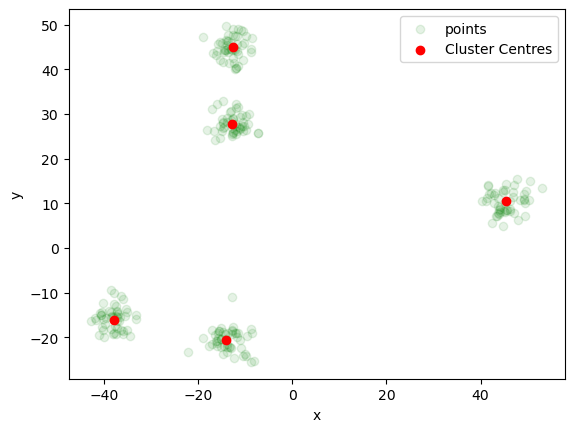

In [3]:
plt.close()

x=[data[i][0] for i in range(data.shape[0])]
y=[data[i][1] for i in range(data.shape[0])]

xc=[centers[i][0] for i in range(centers.shape[0])]
yc=[centers[i][1] for i in range(centers.shape[0])]

plt.scatter(x,y, color='g', label="points", alpha=0.1)
plt.scatter(xc,yc, color='r', label="Cluster Centres")
plt.legend(loc='upper right', fancybox=True)
plt.xlabel('x')
plt.ylabel('y')

>**Question 2**
>
>1. On commence l'algorithme k-means en choisissant $k$ centroïdes initiaux au hasard. Ecrire une fonction effectuant cette initialisation.
>
>2. Une variation simple mais permettant souvent d'accelerer le convergence est de choisir les centroïdes initiaux parmi les données. Écrire une fonction effectuant cette variante. _Attention à ne pas tirer deux fois le même point !_

In [4]:
   
    
def init_centroid_hasard(k,min=-50,max=50):
    """
    picks k random points
    """

    return -1

init=init_centroid_hasard(5)
print(init)   


def init_centroid_donnees(k,data):
    """
    picks k random points among data
    """
    
    return -1



-1


On trace les données en ajoutant les centroides tirés au hasard.

In [7]:

x=[data[i][0] for i in range(data.shape[0])]
y=[data[i][1] for i in range(data.shape[0])]

xc=[centers[i][0] for i in range(len(centers))]
yc=[centers[i][1] for i in range(len(centers))]

xct=[init[i][0] for i in range(len(init))]
yct=[init[i][1] for i in range(len(init))]

plt.scatter(x,y, color='g', label="points", alpha=0.1)
plt.scatter(xc,yc, color='r', label="Cluster Centres")
plt.scatter(xct,yct, marker='+', color='0.1', label="Centroids")

plt.legend(loc='upper right', fancybox=True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


TypeError: object of type 'int' has no len()

>**Question 3**
>
>Une des parties clef de l'algorithme des kmeans est de mettre à jour les centroïdes en prenant le barycentre des points d'une région (i.e. la moyenne des coordonnées). <br>
Écrire une fonction `centroid_update(cluster)` effectuant le calcul du nouveau centroide du cluster en paramètre

In [6]:

def distance(p1,p2):
    """
    Computes the (euclidian) distance between p1 and p2
    """
    return np.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)


def centroid_update(cluster):
    """
    Computes the middle point among a cluster
    """

              
    return (-1,-1)

centroid_update(data)




(-1, -1)

On défini maintenant l'algorithme principal : à chaque tour, 

1) chaque point est assigné au centroïde le plus proche (ce qui permet de définir des "régions")

2) on calcule les nouveaux centroïdes, en prennant le barycentre de chaque région.

On s'arrête quand les centroïdes n'évoluent plus beaucoup (différence entre deux centroides successifs inférieure à $10^{-3}$ par exemple).

>**Question 4**
>
>
>Écrire une fonction <tt>regions_update</tt> qui place chaque point dans la région du centroïde le plus proche. Cette fonction renvoie une liste 
>
>
>_visualisation :_
>Tracer les points d'une même région dans une seule couleur, différente pour chaque région.

In [1]:
k=5
def regions_update(k, data, centroids):
    regions = [[] for i in range(k)]

    return regions


#init=init_centroid_hasard(5,data)
init=init_centroid_donnees(5,data)

regions=regions_update(k, data, init)


for i in range(len(regions)):
    xr=[regions[i][j][0] for j in range(len(regions[i]))]
    yr=[regions[i][j][1] for j in range(len(regions[i]))]
    label = "region "+ str(i)
    plt.scatter(xr,yr,alpha=0.1, label=label)

xct=[init[i][0] for i in range(len(init))]
yct=[init[i][1] for i in range(len(init))]
#plt.scatter(xc,yc, color='r', label="Cluster Centres")
plt.scatter(xct,yct,s=100, marker='+', c = cycle[:len(xct)], label="Centroids")  
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('x')
plt.ylabel('y')
plt.show()


NameError: name 'init_centroid_donnees' is not defined

>**Question 5**
>
>Écrire une fonction <tt>centroids_update</tt> qui actualise les centroïdes au barycentres des régions (en >utilisantcentroid_update comme sous fonction).
>
>_remarque_ attention, une région peut être vide. Dans ce cas il convient de choisir un point au hasard pour l'actualisation.
>
>
>_visualisation :_
>Tracer l'évolution des centroïdes.

In [2]:
def centroids_update(data,centroids,regions):
    """
    Actualise les centroïdes
    
    INPUTS:
    data (array): données
    centroids (array): ancien centroïdes
    regions (array): partionnement des donnée
    
    OUTPUTS
    centroids (array): nouveaux centroïdes
    diff (foat): distance maximale de déplacement d'un centroïde lors de l'actualisation
    
    """
    diffs=[]
    centroids_new=[]





>**Question 6**
>
>
>Assembler toutes les fonctions précédentes pour obtenir l'algorithme des k-means.
>
>Le critère d'arrêt est que les centroides ne doivent pas bouger plus qu'un seuil prédéfini.
>
>_Remarque : on pourra garder en mémoire le coût total de clustering, c'est-à-dire $ \sum_{i=1}^{k} \; \sum_{x_j \in S_i} \;  \left\|x_j -  μ_i  \right\|^2$_

In [16]:
def k_means(k, data, stop_diff=1e-3):
    
    """

    main kmeans algorithm
    
    """
    
    return -1




centroids, regions, errors, pathX,pathY,init=k_means(k, data)

print(errors)
print(pathX[i])

6 rounds done
[50.31774559937752, 46.55345414110134, 44.772337493467, 44.27152067026571, 43.852820306426395, 43.85014492349688, 43.85014492349688]
[4.2, 4.220833333333333, 4.191304347826087, 4.18, 4.165909090909091, 4.153488372093023, 4.153488372093023]


**Visualisation**

Tracer le chemin parcouru par les centroïdes, ainsi que le partionnement final.

14 rounds done


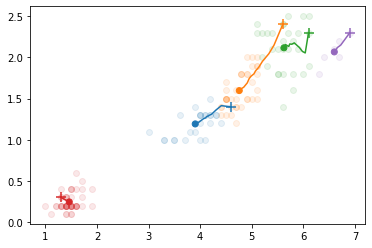

In [17]:

centroids, regions, errors, pathX,pathY,init=k_means(k, data)

for i in range(len(regions)):
    xr=[regions[i][j][0] for j in range(len(regions[i]))]
    yr=[regions[i][j][1] for j in range(len(regions[i]))]
    label = "region "+ str(i)
    plt.scatter(xr,yr,alpha=0.1, label=label)
    
xct=[init[i][0] for i in range(len(init))]
yct=[init[i][1] for i in range(len(init))]
#plt.scatter(xc,yc, color='r', label="Cluster Centres")
plt.scatter(xct,yct,s=100, marker='+', c = cycle[:len(xct)], label="Centroides")    

xct=[centroids[i][0] for i in range(len(init))]
yct=[centroids[i][1] for i in range(len(init))]
plt.scatter(xct,yct, marker='o', c = cycle[:len(xct)], label="Centroids")

for i in range(k):
    plt.plot(pathX[i],pathY[i])

Enfin, on trace le cout du clustering pour chaque iteration de l'algorithme *k-mean*.

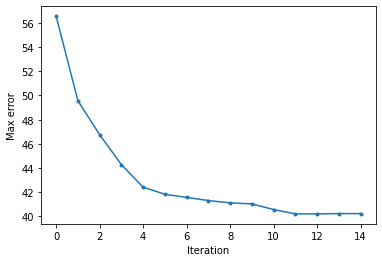

In [18]:
#l'erreur entre les centroides et les données  centre des clusters connu (par génération des données)




plt.plot(errors, '.-')
plt.xlabel('Iteration')
plt.ylabel('Max error')

plt.show()

>**Question 7**
>
>
>Essayer de lancer la fonction avec un nombre de clusters recherchés différents du nombre utlisé à la création des clusters (ex : on cherche 5 clusters alors qu'on en a créé 3 dans notre jeu de données)

## 2 - Application sur un jeu de données classique : the Iris Dataset

In [9]:
from sklearn import datasets

#chargement de base de données iris
iris = datasets.load_iris()
#print(iris)
#print(iris.data)
print(iris.feature_names)
#print(iris.target)
#print(iris.target_names)


# On ne va prendre que la longueur et largeur des pétales comme critères de clustering (pour être en deux dimensions)
data = []
for i in range(len(iris.data)):
    subData = [iris.data[i][2], iris.data[i][3]]
    data.append(subData)
data = np.asarray(data)
#print(data)



    

ModuleNotFoundError: No module named 'sklearn'

>__Question 7__ Appliquer l'algorithme k-means sur ces données et représenter visuellement le résultat 

7 rounds done
[(1.4620000000000002, 0.24599999999999997), (5.595833333333334, 2.0375), (4.26923076923077, 1.3423076923076922)]
range(0, 3)


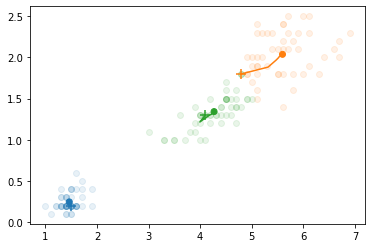

## 3 - Clustering de films et d'utilisateurs

Dans cette partie on se propose une première implémentation d'un clustering des données du sondage que vous avez rempli.

Le code a été récupéré sur internet (https://github.com/gouravaich/k-means-clustering-movie-ratings/blob/master/k-means%20Clustering%20of%20Movie%20Ratings.ipynb) ; puis adapté afin de fonctionner sur nos données.<br>


**À vous de l'améliorer et de l'analyser.**

In [3]:
# importation des packages
import pandas as pd
import seaborn as sns


import scipy.stats as sps
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
# importation du fichier
data = pd.read_csv("notes_films.tsv",sep="\t") #les données ont été un peu retouchées à la main
data.head()

,Numéro étudiant (pour traitement des données).,Aladdin,Aliens : Le Retour,Arrête-moi si tu peux,Avengers: Endgame,Blade Runner,Braveheart,Coco,Django Unchained,Eternal Sunshine of the Spotless Mind,...,The Grand Budapest hotel,The Truman Show,Toy Story,Trainspotting,Un homme d'exception,Un jour sans fin,Usual Suspects,V pour vendetta,WALL·E,Will Hunting
0,19162570,-1,-1,3.0,-1,-1,3.0,-1.0,4.0,-1,...,5,2,2.0,5,-1,-1,4,3,-1,1
1,565656,3,2,2.0,4,-1,-1.0,4.0,3.0,-1,...,4,4,4.0,-1,-1,-1,3,2,5,3
2,52000535,4,-1,5.0,4,-1,-1.0,3.0,-1.0,-1,...,-1,4,4.0,-1,-1,-1,5,-1,5,-1
3,1234567890,-1,-1,3.0,-1,-1,3.0,-1.0,4.0,-1,...,5,2,2.0,5,-1,2,4,3,-1,1
4,2001490,3,2,4.0,5,-1,-1.0,5.0,-1.0,-1,...,-1,-1,3.0,-1,-1,-1,-1,-1,3,-1


In [5]:
#https://github.com/gouravaich/k-means-clustering-movie-ratings/blob/master/k-means%20Clustering%20of%20Movie%20Ratings.ipynb

def draw_movie_clusters(clustered, max_users, max_movies):
    c=1
    for cluster_id in clustered.group.unique():
        # To improve visibility, we're showing at most max_users users and max_movies movies per cluster.
        # You can change these values to see more users & movies per cluster
        d = clustered[clustered.group == cluster_id].drop(['index', 'group'], axis=1)
        n_users_in_cluster = d.shape[0]
        
        #d = sort_by_rating_density(d, max_movies, max_users)
        
        d = d.reindex(d.mean().sort_values(ascending=False).index, axis=1)
        d = d.reindex(d.count(axis=1).sort_values(ascending=False).index)
        d = d.iloc[:max_users, :max_movies]
        n_users_in_plot = d.shape[0]
        
        # We're only selecting to show clusters that have more than 9 users, otherwise, they're less interesting
        if len(d) > 9:
            print('cluster # {}'.format(cluster_id))
            print('# of users in cluster: {}.'.format(n_users_in_cluster), '# of users in plot: {}'.format(n_users_in_plot))
            fig = plt.figure(figsize=(15,4))
            ax = plt.gca()

            ax.invert_yaxis()
            ax.xaxis.tick_top()
            labels = d.columns.str[:40]

            ax.set_yticks(np.arange(d.shape[0]) , minor=False)
            ax.set_xticks(np.arange(d.shape[1]) , minor=False)

            ax.set_xticklabels(labels, minor=False)
                        
            ax.get_yaxis().set_visible(False)

            # Heatmap
            heatmap = plt.imshow(d, vmin=0, vmax=5, aspect='auto')

            ax.set_xlabel('movies')
            ax.set_ylabel('User id')

            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)

            # Color bar
            cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
            cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])

            plt.setp(ax.get_xticklabels(), rotation=90, fontsize=9)
            plt.tick_params(axis='both', which='both', bottom='off', top='off', left='off', labelbottom='off', labelleft='off') 
            #print('cluster # {} \n(Showing at most {} users and {} movies)'.format(cluster_id, max_users, max_movies))

            plt.show()


            # Let's only show 5 clusters
            # Remove the next three lines if you want to see all the clusters
            # Contribution welcomed: Pythonic way of achieving this
            # c = c+1
            # if c > 6:
            
            
def draw_movies_heatmap(most_rated_movies_users_selection, axis_labels=True):
    
    # Reverse to match the order of the printed dataframe
    #most_rated_movies_users_selection = most_rated_movies_users_selection.iloc[::-1]
    
    fig = plt.figure(figsize=(15,4))
    ax = plt.gca()
    
    # Draw heatmap
    heatmap = ax.imshow(most_rated_movies_users_selection,  interpolation='nearest', vmin=-1, vmax=5, aspect='auto')

    if axis_labels:
        ax.set_yticks(np.arange(most_rated_movies_users_selection.shape[0]) , minor=False)
        ax.set_xticks(np.arange(most_rated_movies_users_selection.shape[1]) , minor=False)
        ax.invert_yaxis()
        ax.xaxis.tick_top()
        labels = most_rated_movies_users_selection.columns.str[:40]
        ax.set_xticklabels(labels, minor=False)
        ax.set_yticklabels(most_rated_movies_users_selection.index, minor=False)
        plt.setp(ax.get_xticklabels(), rotation=90)
    else:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    ax.grid(False)
    ax.set_ylabel('User id')

    # Separate heatmap from color bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    # Color bar
    cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
    cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])



    plt.show()
    
    
draw_movies_heatmap(data)

NameError: name 'plt' is not defined

Empty DataFrame
Columns: [Numéro étudiant (pour traitement des données)., group]
Index: []
    index  Numéro étudiant (pour traitement des données).  Aladdin  \
0       0                                        19162570       -1   
1       1                                          565656        3   
2       2                                        52000535        4   
3       3                                      1234567890       -1   
4       4                                         2001490        3   
5       5                                         2101503       -1   
6       6                                         2101418        3   
7       7                                         2101960       -1   
8       8                                         2100148        4   
9       9                                        22101831       -1   
10     10                                         2100210        0   
11     11                                        22100128       -1   

NameError: name 'plt' is not defined